In [17]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import pickle
import seaborn as sns
%matplotlib inline

In [4]:
file_path = "../data/timeseries/AAPL_df.p"

with open(file_path, "rb") as file:
    data_df = pickle.load(file)
data_df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,sector_id
None,,,,,,,,,,,,,,,
0,AAPL,1980-12-12,0.025503,0.025578,0.025778,0.025684,0.011023,0.0,0.0,0.001602,0.001608,0.001631,0.001617,0.063072,6
1,AAPL,1980-12-15,0.023521,0.023431,0.023600,0.023513,0.004119,0.0,0.0,0.001478,0.001473,0.001493,0.001480,0.023567,6
2,AAPL,1980-12-16,0.020614,0.020535,0.020695,0.020619,0.002466,0.0,0.0,0.001295,0.001291,0.001310,0.001298,0.014113,6
3,AAPL,1980-12-17,0.021337,0.021442,0.021595,0.021516,0.002012,0.0,0.0,0.001341,0.001348,0.001367,0.001354,0.011514,6
4,AAPL,1980-12-18,0.022436,0.022523,0.022699,0.022616,0.001706,0.0,0.0,0.001410,0.001416,0.001436,0.001423,0.009763,6


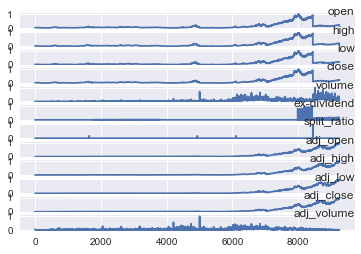

In [21]:
numerical_columns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
i = 1
# plot each column
pyplot.figure()
for group in numerical_columns:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(data_df.values[:, group])
    pyplot.title(data_df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

                 open      high       low     close    volume  ex-dividend  \
open         1.000000  0.999929  0.999901  0.999826  0.284925     0.088183   
high         0.999929  1.000000  0.999880  0.999921  0.286210     0.087802   
low          0.999901  0.999880  1.000000  0.999914  0.282620     0.088165   
close        0.999826  0.999921  0.999914  1.000000  0.284479     0.087847   
volume       0.284925  0.286210  0.282620  0.284479  1.000000     0.013448   
ex-dividend  0.088183  0.087802  0.088165  0.087847  0.013448     1.000000   
split_ratio -0.002556 -0.002496 -0.002558 -0.002414  0.036801    -0.000622   
adj_open     0.567538  0.566646  0.568540  0.567565  0.622491     0.062125   
adj_high     0.567870  0.567053  0.568901  0.567985  0.624500     0.061912   
adj_low      0.566575  0.565711  0.567684  0.566703  0.619561     0.061969   
adj_close    0.567139  0.566334  0.568243  0.567350  0.621857     0.061837   
adj_volume   0.196991  0.199791  0.192893  0.196490  0.559435   

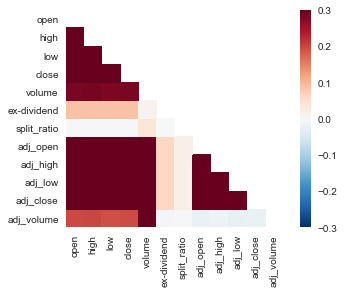

In [33]:
# Check correlation of the features
corr = data_df.loc[:,'open':'adj_volume'].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
    
print(corr)